In [1]:
import collections
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Estadistica descriptiva
Concierne a la manera de desribir un conjunto de datos

## 1. Medidas de tendencia central

La media se denota $\mu$ si es parámetro, o $\bar{x}$ si es estadistico, y se calcula así, donde
$$ x = (x_{0})$$:
$$ \bar{x} = \frac{\sum_{i=1}^{n-1} x_{i}}{n} $$

In [2]:
N = 100000
poblacion = np.random.randint(0,1000,size=N)

In [3]:
poblacion

array([869, 958, 923, ...,  32, 719, 683])

In [4]:
print("La media de la poblacion es: ",np.mean(poblacion))

La media de la poblacion es:  498.91537


In [5]:
muestras = poblacion.reshape((1000,100))

In [6]:
muestras

array([[869, 958, 923, ..., 182, 342, 649],
       [202,  91, 805, ..., 778, 970, 354],
       [228, 239, 719, ..., 666, 944,  96],
       ...,
       [928, 115, 972, ..., 574, 431, 220],
       [178, 558, 171, ...,   6, 536, 795],
       [ 73, 659, 758, ...,  32, 719, 683]])

In [7]:
l=[]
for muestra in muestras:
    l.append(np.mean(muestra))

In [8]:
medias_muestrales=np.mean(muestras,axis=1)
print(len(medias_muestrales))
#medias_muestrales

1000


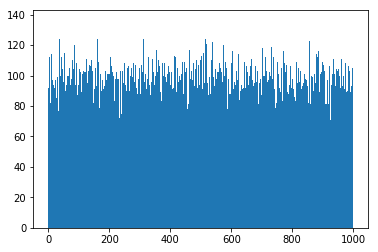

In [9]:
plt.hist(poblacion,bins=1000)
plt.show()

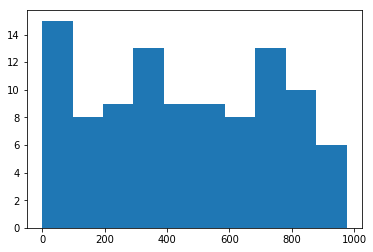

In [10]:
plt.hist(muestras[1])
plt.show()

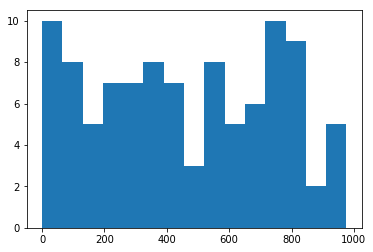

In [11]:
plt.hist(muestras[1],bins=15)
plt.show()

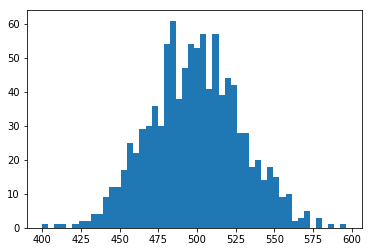

In [12]:
plt.hist(medias_muestrales,bins=50)
plt.show()

¡Oh! [El teorema del limite central](https://es.wikipedia.org/wiki/Teorema_del_l%C3%ADmite_central) ha aparecido

Problemas con la media es sensible a valores atípicos. Ejemplo:

In [13]:
salarios = [14_000 , 20_000, 25_000, 35_000, 18_000]
np.mean(salarios)

22400.0

In [14]:
salarios.append(17_509_066_666)
np.mean(salarios)

2918196444.3333335

## La mediana
Es el valor que se encuentra justo a la mitad de nuestros datos cuando los ordenamos de menor a mayor. 
Si la cantidad de datos es par, tomamos el promedio entre los dos de la mitad

In [15]:
salarios.sort()
salarios

[14000, 18000, 20000, 25000, 35000, 17509066666]

In [16]:
salarios[len(salarios)//2]

25000

In [17]:
np.median(salarios)

22500.0

## La moda 
Es el valor más común. Sólo sirve con variables categóricas. Mejor sacar una tabla de frecuencias

In [18]:
colores = np.random.choice(['Rojo','Verde','Azul'],size=1000)

In [19]:
cuenta = {}
for color in colores:
    if color not in cuenta.keys():
        cuenta[color] = 1
    else:
        cuenta[color]+=1

In [20]:
cuenta

{'Rojo': 369, 'Azul': 304, 'Verde': 327}

In [21]:
cuenta = collections.Counter(colores)
cuenta

Counter({'Rojo': 369, 'Azul': 304, 'Verde': 327})

## Comparación de las tres medidas

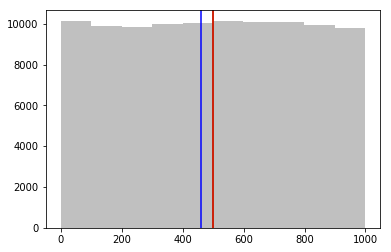

In [22]:
plt.hist(poblacion,color='silver')
plt.axvline(np.mean(poblacion),color='green')
plt.axvline(np.median(poblacion),color='red')
moda = collections.Counter(poblacion).most_common(1)[0][0]
plt.axvline(moda,color='blue')

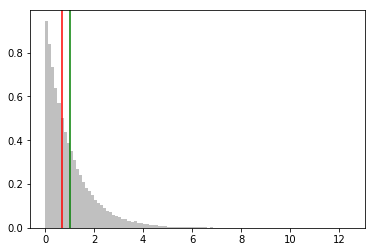

In [23]:
poblacion = np.random.exponential(size=100000)
plt.hist(poblacion,bins=100, color='silver',density=True)
plt.axvline(np.mean(poblacion),color='green')
plt.axvline(np.median(poblacion),color='red')
#moda = collections.Counter(poblacion).most_common(1)[0][0]
#plt.axvline(moda,color='blue')

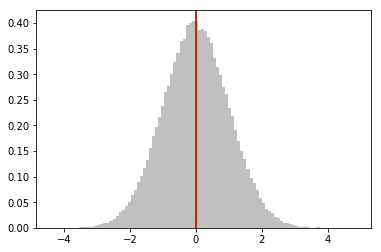

In [24]:
poblacion = np.random.normal(size=100000)
plt.hist(poblacion,bins=100, color='silver',density=True)
plt.axvline(np.mean(poblacion),color='green')
plt.axvline(np.median(poblacion),color='red')
#moda = collections.Counter(poblacion).most_common(1)[0][0]
#plt.axvline(moda,color='blue')

## Medidas de dispersión

La varianza de una muestra es el promedio de las distancias de los valores alrededor de la media... con algunos detallitos


$$ \sigma = \sqrt{\frac{\sum_{i=1}^n {(x_i - \bar{x})}^2}{n}} $$

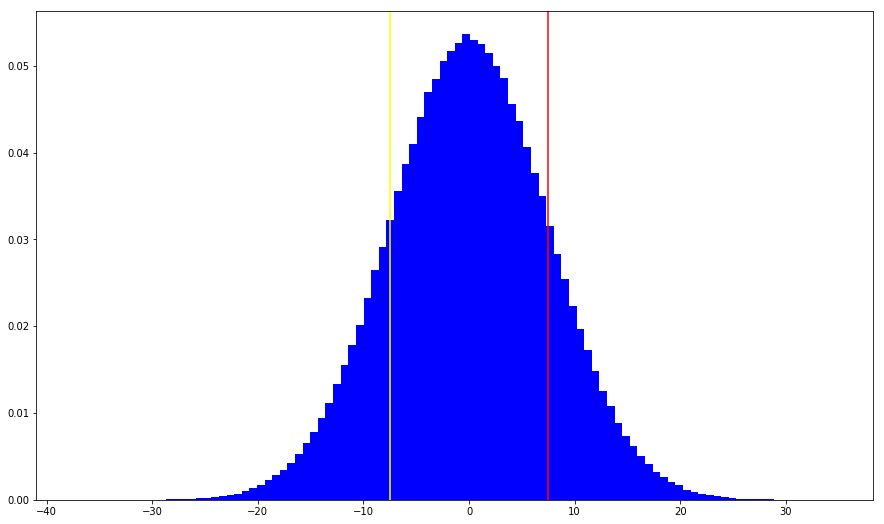

In [25]:
sigma = 7.5
poblacion = np.random.normal(0,sigma,size=1_000_000)
plt.figure(figsize=(15,9))
plt.hist(poblacion,bins=100,color='blue',density=True)
plt.axvline(sigma,color='red')
plt.axvline(-sigma,color='yellow')
plt.show()

In [26]:
poblacion = pd.Series([1,1,1,1,1,2,3,4,5,5,5,5,5,5])
muestra = pd.Series([1,2,3,4,5])

In [27]:
def desviacion_estandar(x):
    n = len(x)
    m = sum(x)/n
    return math.sqrt(sum((xi-m)**2 for xi in x)/n)

In [28]:
desviacion_estandar(poblacion)

1.8070158058105024

In [29]:
desviacion_estandar(muestra)

1.4142135623730951

In [30]:
def desviacion_estandar1(x):
    n = len(x)
    m = sum(x)/n
    return (sum((xi-m)**2 for xi in x)/(n-1))**(1/2)

In [31]:
desviacion_estandar1(muestra)

1.5811388300841898

**Leccion para llevar en el corazón:** Para describir una distribución, lo minimo aceptable es describirla como $\mu \pm \sigma$

## Correlación

In [32]:
tabla = pd.read_csv('Datos/TR_PERSONA17.CSV',encoding='latin1')
tabla.head()

,ID_VIV,ID_PERSONA,ENT,NOM_ENT,MUN,NOM_MUN,LOC50K,NOM_LOC,COBERTURA,ESTRATO,...,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,TAMLOC
0,170010000001,17001000000101,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,170010000002,17001000000201,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-06,...,7.0,0.0,7.0,8.0,1978.0,1.0,NaN,NaN,NaN,1
2,170010000003,17001000000303,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,170010000003,17001000000301,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,170010000003,17001000000302,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,1.0,0.0,1.0,10.0,2012.0,1.0,NaN,NaN,NaN,2


In [33]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368976 entries, 0 to 368975
Data columns (total 86 columns):
ID_VIV                368976 non-null int64
ID_PERSONA            368976 non-null int64
ENT                   368976 non-null int64
NOM_ENT               368976 non-null object
MUN                   368976 non-null int64
NOM_MUN               368976 non-null object
LOC50K                368976 non-null int64
NOM_LOC               368976 non-null object
COBERTURA             368976 non-null int64
ESTRATO               368976 non-null object
UPM                   368976 non-null int64
FACTOR                368976 non-null int64
NUMPER                368976 non-null int64
SEXO                  368976 non-null int64
EDAD                  368976 non-null int64
PARENT                368976 non-null int64
PARENT_OTRO_C         368976 non-null int64
IDENT_MADRE           368976 non-null int64
IDENT_PADRE           368976 non-null int64
SERSALUD              368976 non-null int64
AFROD

In [34]:
tabla = tabla[['EDAD','INGTRMEN']]
tabla.head()

,EDAD,INGTRMEN
0,30,10000.0
1,71,NaN
2,2,NaN
3,23,4286.0
4,24,4286.0


In [35]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368976 entries, 0 to 368975
Data columns (total 2 columns):
EDAD        368976 non-null int64
INGTRMEN    141399 non-null float64
dtypes: float64(1), int64(1)
memory usage: 5.6 MB


In [36]:
tabla = tabla.dropna()
tabla = tabla[(tabla['EDAD']<90)&(tabla['INGTRMEN']<500_000)]

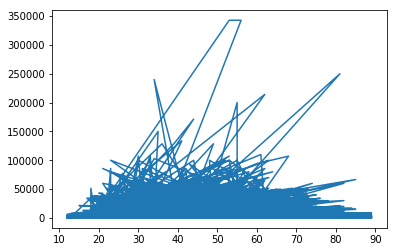

In [37]:
plt.plot(tabla['EDAD'],tabla['INGTRMEN'])

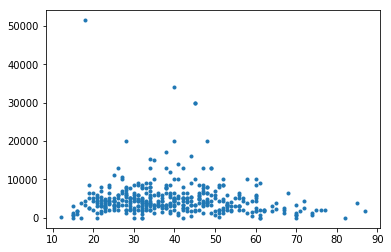

In [38]:
muestra = tabla.sample(400)
plt.plot(muestra['EDAD'], muestra['INGTRMEN'], marker='.', linestyle='none')

-Covarianza
$$ \mathrm{Cov}(x,y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{n-1} $$

-Coeficiente de correlacion de Pearson:
$$r = \frac{\mathrm{Cov}(x,y)}{\sigma_x \, \sigma_y} $$

In [39]:
def pearson(x,y):
    n = len(x)
    assert n == len(y)
    media_x = sum(x)/n
    media_y = sum(y)/n
    covarianza = sum((x[i] - media_x)*(y[i] - media_y) for i in range(n))
    desviacion_x = (sum((x[i] - media_x)**2 for i in range(n)))**.5
    desviacion_y = (sum((y[i] - media_y)**2 for i in range(n)))**.5
    return covarianza/(desviacion_x*desviacion_y)

In [40]:
x = list(tabla['EDAD'])
y = list(tabla['INGTRMEN'])
pearson(x, y)

0.05270366257486169

In [41]:
np.corrcoef(x,y)

array([[1.        , 0.05270366],
       [0.05270366, 1.        ]])

In [42]:
tabla = pd.read_csv('Datos/TR_PERSONA17.CSV',encoding='latin1')
tabla.head()

,ID_VIV,ID_PERSONA,ENT,NOM_ENT,MUN,NOM_MUN,LOC50K,NOM_LOC,COBERTURA,ESTRATO,...,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,TAMLOC
0,170010000001,17001000000101,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,170010000002,17001000000201,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-06,...,7.0,0.0,7.0,8.0,1978.0,1.0,NaN,NaN,NaN,1
2,170010000003,17001000000303,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,170010000003,17001000000301,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,170010000003,17001000000302,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,1.0,0.0,1.0,10.0,2012.0,1.0,NaN,NaN,NaN,2


In [43]:
tabla = tabla[['EDAD','INGTRMEN','ESCOACUM']]
tabla.head()

,EDAD,INGTRMEN,ESCOACUM
0,30,10000.0,16.0
1,71,NaN,6.0
2,2,NaN,NaN
3,23,4286.0,9.0
4,24,4286.0,6.0


In [44]:
tabla['ESCOACUM'].describe()

count    350144.000000
mean          7.789138
std           8.010872
min           0.000000
25%           3.000000
50%           8.000000
75%          10.000000
max          99.000000
Name: ESCOACUM, dtype: float64

In [45]:
tabla = tabla.dropna()
tabla = tabla[(tabla['EDAD']<90)&(tabla['INGTRMEN']<500_000)&(tabla['ESCOACUM']<90)]

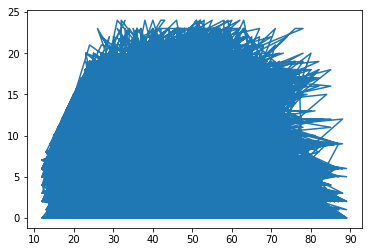

In [46]:
plt.plot(tabla['EDAD'],tabla['ESCOACUM'])

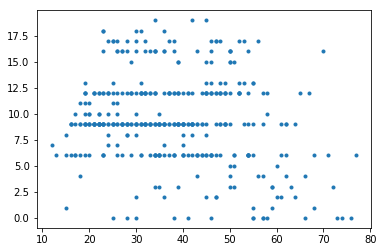

In [47]:
muestra = tabla.sample(400)
plt.plot(muestra['EDAD'], muestra['ESCOACUM'], marker='.', linestyle='none')

In [48]:
x = list(tabla['EDAD'])
y = list(tabla['ESCOACUM'])
pearson(x, y)

-0.25289121524136815

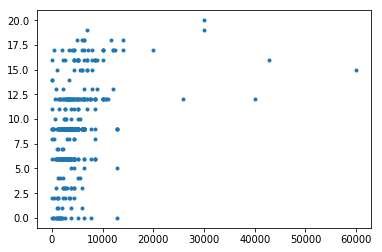

In [49]:
muestra = tabla.sample(400)
plt.plot(muestra['INGTRMEN'], muestra['ESCOACUM'], marker='.', linestyle='none')

In [50]:
x = list(tabla['ESCOACUM'])
y = list(tabla['INGTRMEN'])
pearson(x, y)

0.3255209087442133

In [51]:
tabla.columns

Index(['EDAD', 'INGTRMEN', 'ESCOACUM'], dtype='object')

In [52]:
tabla = pd.read_csv('Datos/TR_PERSONA17.CSV',encoding='latin1')
tabla.head()

,ID_VIV,ID_PERSONA,ENT,NOM_ENT,MUN,NOM_MUN,LOC50K,NOM_LOC,COBERTURA,ESTRATO,...,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,TAMLOC
0,170010000001,17001000000101,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,170010000002,17001000000201,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-06,...,7.0,0.0,7.0,8.0,1978.0,1.0,NaN,NaN,NaN,1
2,170010000003,17001000000303,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,170010000003,17001000000301,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,170010000003,17001000000302,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,1.0,0.0,1.0,10.0,2012.0,1.0,NaN,NaN,NaN,2


In [53]:
numericas = tabla.dtypes == np.dtype('float64')

In [54]:
columnas_numericas = [key for (key,value) in numericas.to_dict().items() if value]
tabla_num = tabla[columnas_numericas]
tabla_num.head()

,DHSERSAL2,HLENGUA,QDIALECT_C,QDIALECT_INALI,HESPANOL,ELENGUA,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,...,ACTI_SIN_PAGO8,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A
0,NaN,3.0,NaN,NaN,NaN,3.0,7.0,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,3.0,NaN,NaN,NaN,3.0,7.0,NaN,NaN,NaN,...,1.0,7.0,0.0,7.0,8.0,1978.0,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,NaN,NaN,3.0,7.0,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,3.0,7.0,NaN,NaN,NaN,...,2.0,1.0,0.0,1.0,10.0,2012.0,1.0,NaN,NaN,NaN


In [55]:
#Porcentaje de NA por columna
na_por_col = {columna: np.round(100* np.mean(tabla_num[columna].isnull())) for columna in tabla_num}
np.corrcoef(tabla_num)

MemoryError: 

In [ ]:
columnas_seleccionadas = [nombre for (nombre,porcentaje) in na_por_col.items() if porcentaje <=10]
(tabla[columnas_seleccionadas].dropna()).corr()

In [ ]:
numericas1 = tabla.dtypes == np.dtype('int64')

In [ ]:
columnas_numericas1 = [key for (key,value) in numericas1.to_dict().items() if value]
tabla_num1 = tabla[columnas_numericas1]
tabla_num1.head()

In [ ]:
#Porcentaje de NA por columna
na_por_col1 = {columna1: np.round(100* np.mean(tabla_num1[columna1].isnull())) for columna1 in tabla_num1}
np.corrcoef(na_por_col1)

In [ ]:
columnas_seleccionadas1 = [nombre for (nombre,porcentaje) in na_por_col1.items() if porcentaje <=10]
(tabla[columnas_seleccionadas1].dropna()).corr()

In [ ]:
df_nba = pd.read_csv('Kaggle/nba.csv')
df_nfl = pd.read_csv('Kaggle/nfl.csv')
df_nfl.head()

In [ ]:
df_nba = df_nba[['age','player_height','player_weight']]
df_nba.columns = ['edad', 'estatura', 'peso']
df_nba.head()

In [ ]:
df_nfl = df_nfl[['Age','Height (inches)','Weight (lbs)']]
df_nfl.head()
df_nfl.columns = ['edad','altura','peso']
df_nfl['altura'] = df_nfl['altura']*2.54
df_nfl['peso'] = df_nfl['peso']*.453592
df_nfl = df_nfl[df_nfl['edad']<=80]

In [ ]:
df_nba.dropna(inplace=True)
df_nfl.dropna(inplace=True)

In [ ]:
df_nba.corr()

In [ ]:
df_nfl.corr()

In [ ]:
df_nba.hist(bins=20, density=True)
None

In [ ]:
df_nfl.hist(bins=20, density=True)
None

In [ ]:
muestra_nba = df_nba.sample(400)
muestra_nfl = df_nfl.sample(400)
plt.plot(muestra_nba['player_weight'],muestra_nba['player_height'],'.',alpha=1,color='blue')
plt.plot(muestra_nfl['peso'],muestra_nfl['altura'],'.',alpha=1,color='green')

In [ ]:
muestra_nba = df_nba.sample(400)
muestra_nfl = df_nfl.sample(400)
plt.plot(muestra_nba['player_height'],muestra_nba['player_weight'],'.',alpha=1,color='blue')
plt.plot(muestra_nfl['altura'],muestra_nfl['peso'],'.',alpha=1,color='green')

Si r es el coeficiente de relación de Pearson , la r^2 (A veces escrita en mayuscula como R^2) es un valor entre 0 y 1 que nos indica el poder explicativo de una variable en terminos de la otra

In [ ]:
0.835145**2